# <a href="https://mipt-stats.gitlab.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 4. Регрессия и классификация. <font color="blue"><i>Легкая часть</i></font>


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате ipynb.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 3 балла
* Задача 2 &mdash; 6 баллов
* Задача 3 &mdash; 2 балла

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):
* Задача 4 &mdash; 2 балла
* Задача 5 &mdash; 5 баллов
* Задача 6 &mdash; 5 баллов
* Задача 7 &mdash; 3 балла

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.

In [63]:
import numpy as np
import scipy.stats as sps
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)
pd.options.mode.chained_assignment = None  

### <font color="blue"><i>Легкая часть</i></font>

### Задача 1.

В этой задаче нужно визуализировать *центральную предельную теорему*. Перед выполнением этой задачи настоятельно рекомендуется посмотреть <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/LLN.html">ноутбук</a> с лекции про закон больших чисел. За использование циклов оценка может быть существенно снижена.

**a).** Пусть $\xi_1, ..., \xi_n$ &mdash; независимые случайные величины из распределения $Exp(\lambda)$. Согласно центральной предельной теореме выполнена сходимость $$Z_n = \frac{X_n - \mathsf{E}X_n}{\sqrt{\mathsf{D}X_n}} \stackrel{d}{\longrightarrow} \mathcal{N}(0, 1),$$ где $X_n = \sum\limits_{i=1}^n \xi_i$. Вам нужно убедиться в этом, сгенерировав множество наборов случайных величин и посчитав по каждому из наборов величину $Z_n$ в зависимости от размера набора. 

Сгенерируйте 500 наборов случайных величин $\xi_1^j, ..., \xi_{300}^j$ из распределения $Exp(1)$. По каждому из них посчитайте сумму $X_{jn} = \sum\limits_{i=1}^n \xi_i^j$ для $1 \leqslant n \leqslant 300$, то есть сумма первых $n$ величин $j$-го набора. Для этого среднего посчитайте величину $$Z_{jn} = \frac{X_{jn} - \mathsf{E}X_{jn}}{\sqrt{\mathsf{D}X_{jn}}}.$$
Обратите внимание, что нужно взять теоретические математическое ожидание и дисперсию, а не вычислять их по выборке.

In [55]:
def get_cum_zetas(gen_func, func_mean, func_std, number_of_tries, cum_size):
    values = gen_func(size = ( number_of_tries,cum_size))
    cum_Xn = values.cumsum(axis = 1)
    arifm = np.linspace(1,cum_size, cum_size)
    cum_Zn = (cum_Xn - func_mean * arifm) / (func_std * np.sqrt(arifm))
    return cum_Zn

Для каждого $j$ нанесите на один график зависимость $Z_{jn}$ от $n$. Каждая кривая должна быть нарисована *одним цветом* с прозрачностью `alpha=0.05`. Сходятся ли значения $Z_{jn}$ к какой-либо константе?

In [56]:
def do_plot(cum_zetas, number_of_tries, cum_size, alpha = 0.05):
    plt.figure(figsize=(16, 9))
    for vals in cum_zetas:
        plt.plot(np.linspace(1,cum_size, cum_size),  vals, color='blue', alpha = alpha)
    plt.xlabel('Количество случайных величин', fontsize = 15)
    plt.ylabel('Значение Z_n', fontsize = 15)
    plt.show()

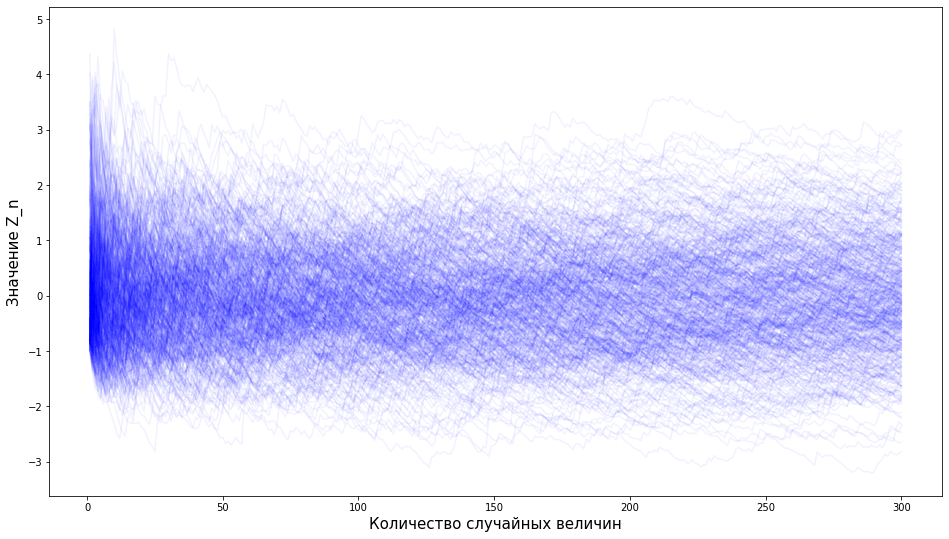

In [57]:
cum_zetas = get_cum_zetas(sps.expon().rvs,sps.expon.mean(), sps.expon.std(), 500, 300)
do_plot(cum_zetas, 500, 300)

Значения не сходятся к какой-то определенной константе. Тем не менее, они почти все расположены в интервале от -2 до 2

Для $n=300$ по набору случайных величин $Z_{1,300}, ..., Z_{500,300}$ постройте гистограмму. Похожа ли она на плотность распределения $\mathcal{N}(0, 1)$, которую тоже постройте на том же графике? Не забудьте сделать легенду.

In [58]:
def histogram_and_density(cum_zetas, number_of_tries, cum_size, title):
    plt.figure(figsize = (16,5))
    grid = np.linspace(-3, 3, 100)
    plt.hist(cum_zetas.T[cum_size - 1],
             density = True,
             bins = 20,
             label = 'Значения $Z_{n, 300}$'
             )
    plt.plot(grid,
             sps.norm.pdf(grid),
             color = 'green',
             label = r'Плотность стандартного нормального распределения$'
            )
    plt.title(title)
    plt.legend()
    plt.grid(ls=':')
    plt.show()

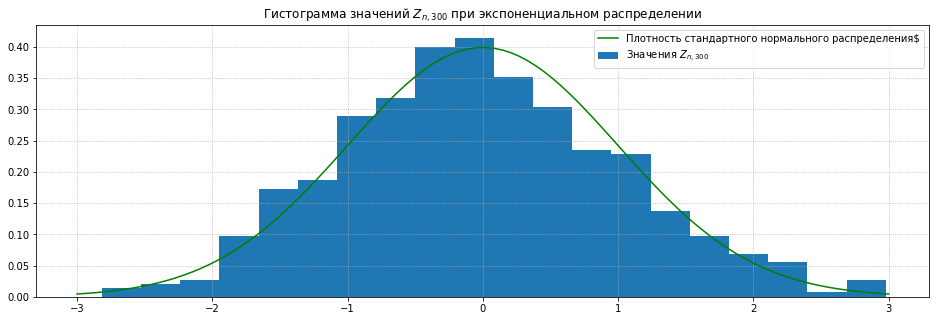

In [59]:
histogram_and_density(cum_zetas, 500, 300, 'Гистограмма значений $Z_{n,300}$ при экспоненциальном распределении')

Как и ожидалось, гистограмма значений оказалась похоже на плотность стандартного нормального распределения.

**b).** Выполните те же действия для распределений $U(0, 1)$ и $Pois(1)$.

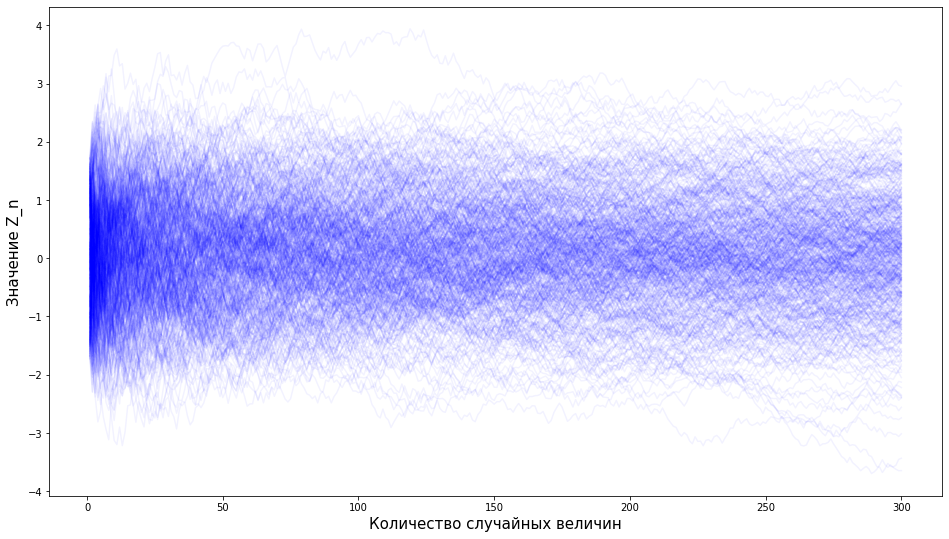

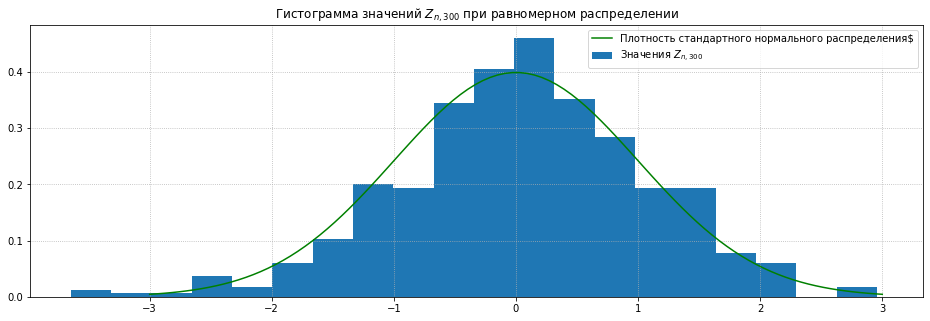

In [60]:
cum_zetas2 = get_cum_zetas(sps.uniform().rvs,sps.uniform.mean(), sps.uniform.std(), 500, 300)
do_plot(cum_zetas2, 500, 300)
histogram_and_density(cum_zetas2, 500, 300, 'Гистограмма значений $Z_{n,300}$ при равномерном распределении')

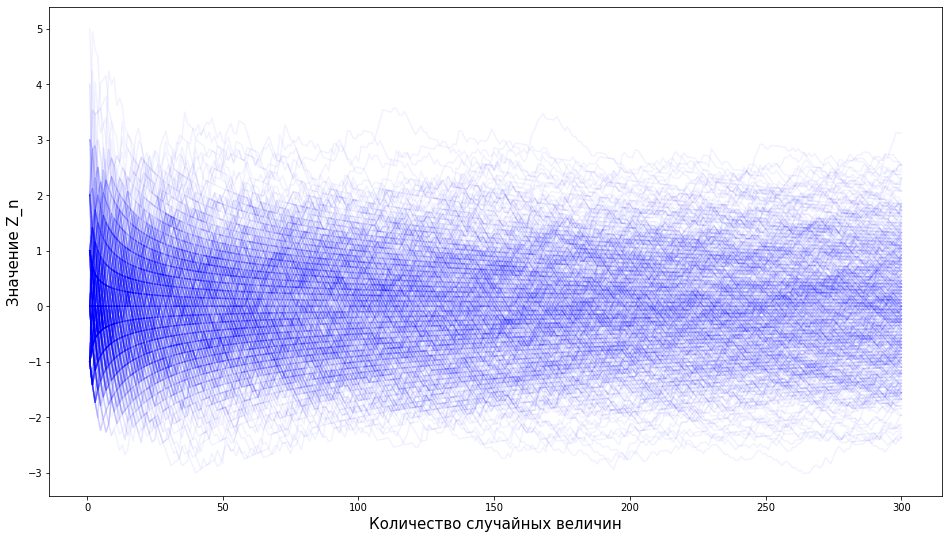

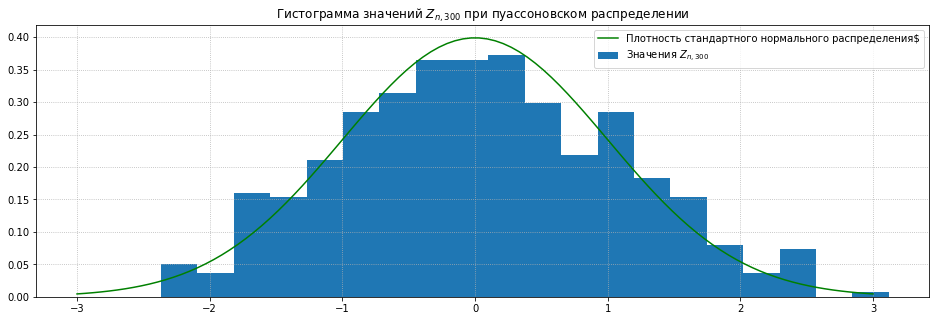

In [61]:
cum_zetas3 = get_cum_zetas(sps.poisson(1).rvs,sps.poisson.mean(1), sps.poisson.std(1), 500, 300)
do_plot(cum_zetas3, 500, 300)
histogram_and_density(cum_zetas3, 500, 300, 'Гистограмма значений $Z_{n,300}$ при пуассоновском распределении')

Сделайте вывод о смысле центральной предельной теоремы. Подтверждают ли сделанные эксперименты теоретические свойства?

Рекомендуем также посмотреть <a target="_blank" href="https://www.zoology.ubc.ca/~whitlock/Kingfisher/CLT.htm">интерактивную визуализацию</a>.

Проведенные эксперементы подтверждают корректность центральной предельной теоремы. Смысл ее заключается в том, что можно оценить погрешность средних случайных величин при большом числе экспериментов через стандартное нормальное распределение. При этом известна скорость сходимости от числа экспериментов -- оценка разности составляет $\frac{c}{\sigma^3 \sqrt n}$, где $c$ -- некоторая константа. 

### Задача 2.

Скоро лето &mdash; идеальное время года для путешествий и прогулок по городу на велосипедах. В крупных городах обычно развиты сети проката велосипедов, предоставляющие удобный сервис. Одной из важных задач таких компаний является прогнозирование количества арендованных велосипедов в зависимости от времени года и погодных условий.

Рассмотрим датасет <a target="_blank" href="https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset">Bike Sharing Dataset</a> от компании <a target="_blank" href="https://www.capitalbikeshare.com/">Capital Bikeshare</a>, располагающей автоматизированными пунктами проката велосипедов в ряде городов США. В датасете по дням записаны календарная информация и погодные условия, а также число прокатов в этот день. Цель &mdash; предсказать количество арендованных велосипедов по остальным характеристикам.

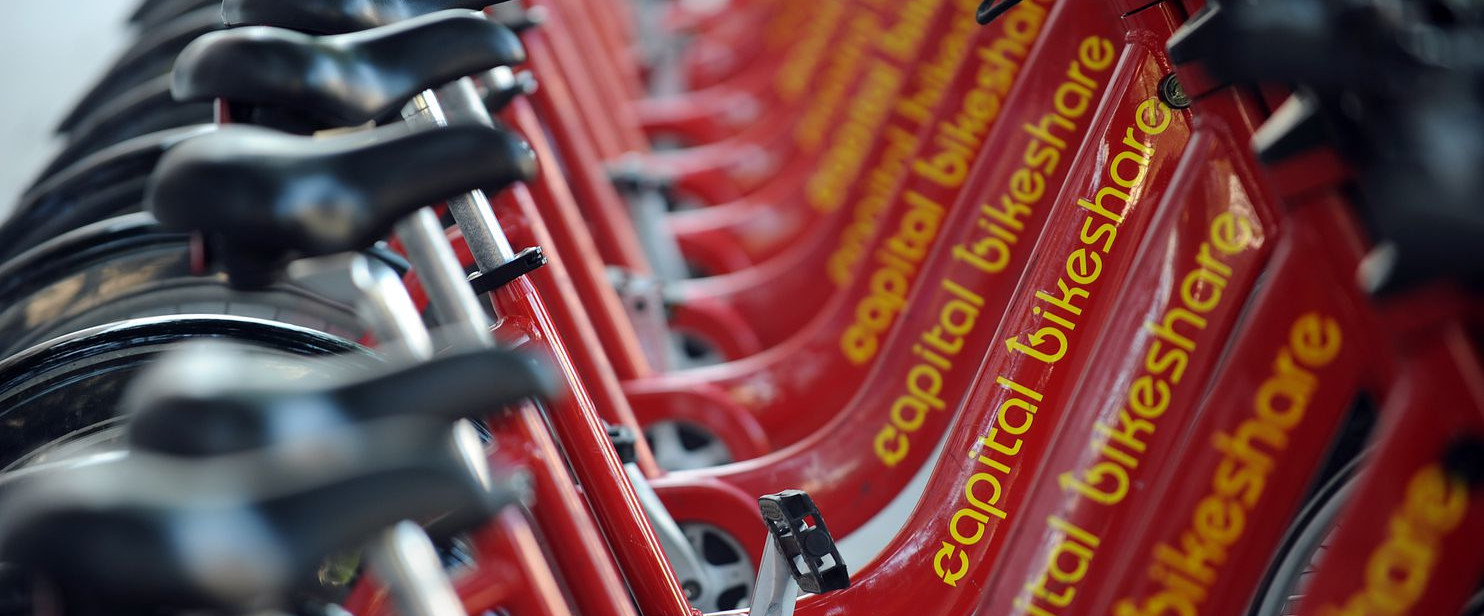

Будем работать только со следующими признаками:
* `season`: время года: 1 &mdash; весна, 2 &mdash; лето, 3 &mdash; осень, 4 &mdash; зима;
* `mnth`: месяц от 1 до 12;
* `holiday`: является ли текущий день праздничным;
* `weekday`: день недели от 0 до 6;
* `workingday`: является ли текущий день рабочим или выходным;
* `weathersit`: оценка благоприятности погоды от 1 (чистый, ясный день) до 4 (ливень, туман);
* `temp`: температура в Цельсиях;
* `atemp`: температура по ощущениям в Цельсиях;
* `hum`: влажность воздуха;
* `windspeed`: скорость ветра;
* `cnt`: количество арендованных велосипедов в текущий день.

Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/linreg_sklearn.html">ноутбук</a> с занятия по линейной регрессии.

---

Скачайте данные, загрузите их с помощью `pandas` и разделите на обучающую и тестовую части в соотношении 4:1. Далее всю аналитику необходимо проводить только на обучающей части данных.

In [124]:
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed']
category_cols = ['season', 'mnth', 'weekday','holiday', 'workingday', 'weathersit']
target = 'cnt'

In [125]:
bike_data = pd.read_csv('day.csv')
bike_data = bike_data[numeric_cols + category_cols + ['cnt']]

In [126]:
bike_data.head()

,temp,atemp,hum,windspeed,season,mnth,weekday,holiday,workingday,weathersit,cnt
0,0.344167,0.363625,0.805833,0.160446,1,1,6,0,0,2,985
1,0.363478,0.353739,0.696087,0.248539,1,1,0,0,0,2,801
2,0.196364,0.189405,0.437273,0.248309,1,1,1,0,1,1,1349
3,0.200000,0.212122,0.590435,0.160296,1,1,2,0,1,1,1562
4,0.226957,0.229270,0.436957,0.186900,1,1,3,0,1,1,1600


В readme написано, что часть данных отнормирована. Вернем их в прежнее состояние:

In [127]:
bike_data['temp'] *= 41
bike_data['atemp'] *= 50
bike_data['hum'] *= 100
bike_data['windspeed'] *= 67

Проверим, что в данных отсутвуют пропуски:

In [128]:
bike_data.isna().mean()

temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
season        0.0
mnth          0.0
weekday       0.0
holiday       0.0
workingday    0.0
weathersit    0.0
cnt           0.0
dtype: float64

In [129]:
train_data, test_data = train_test_split(bike_data, test_size=0.2)

Посмотрите по графикам, как целевой признак зависит от остальных и поймите характер зависимости целевого признака от остальных. 

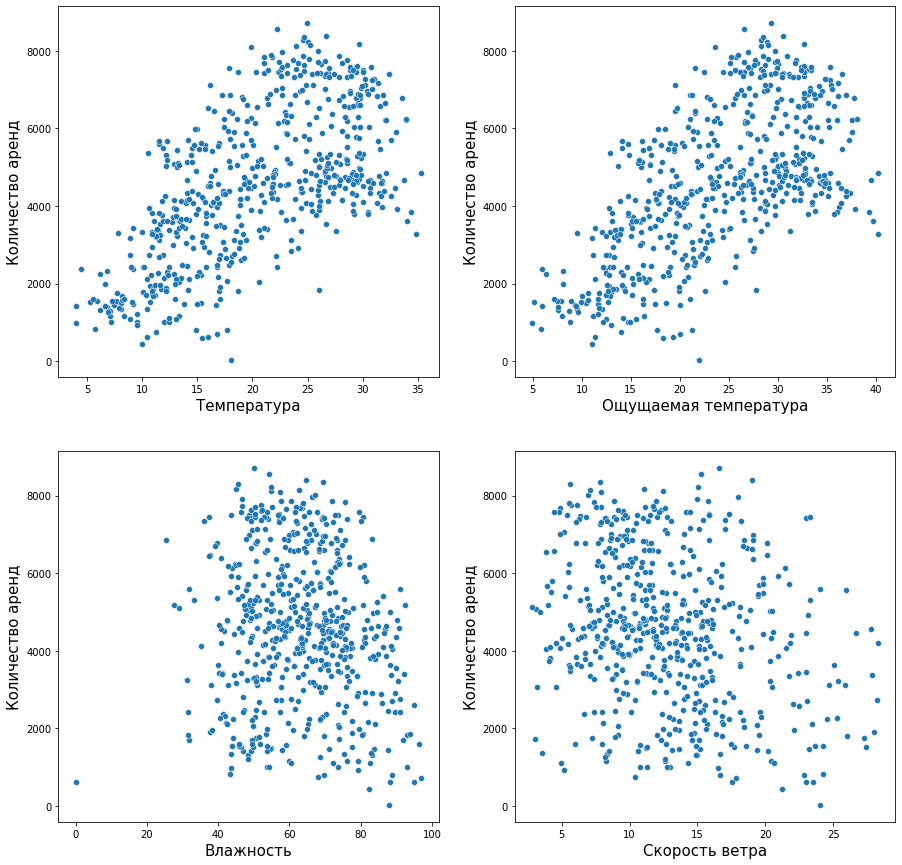

In [130]:
numeric_labels = ['Температура', 'Ощущаемая температура', 'Влажность', 'Скорость ветра']
fig, axes = plt.subplots(2, 2, figsize = (15, 15))
for ax, col, xlabel in zip(axes.flat, numeric_cols,numeric_labels):
    sns.scatterplot(data = train_data, x = col, y = target, ax = ax)
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel('Количество аренд', fontsize = 15)

In [131]:
train_data['season'] = train_data['season'].apply(lambda x: x - 1)
train_data['mnth'] = train_data['mnth'].apply(lambda x: x - 1)

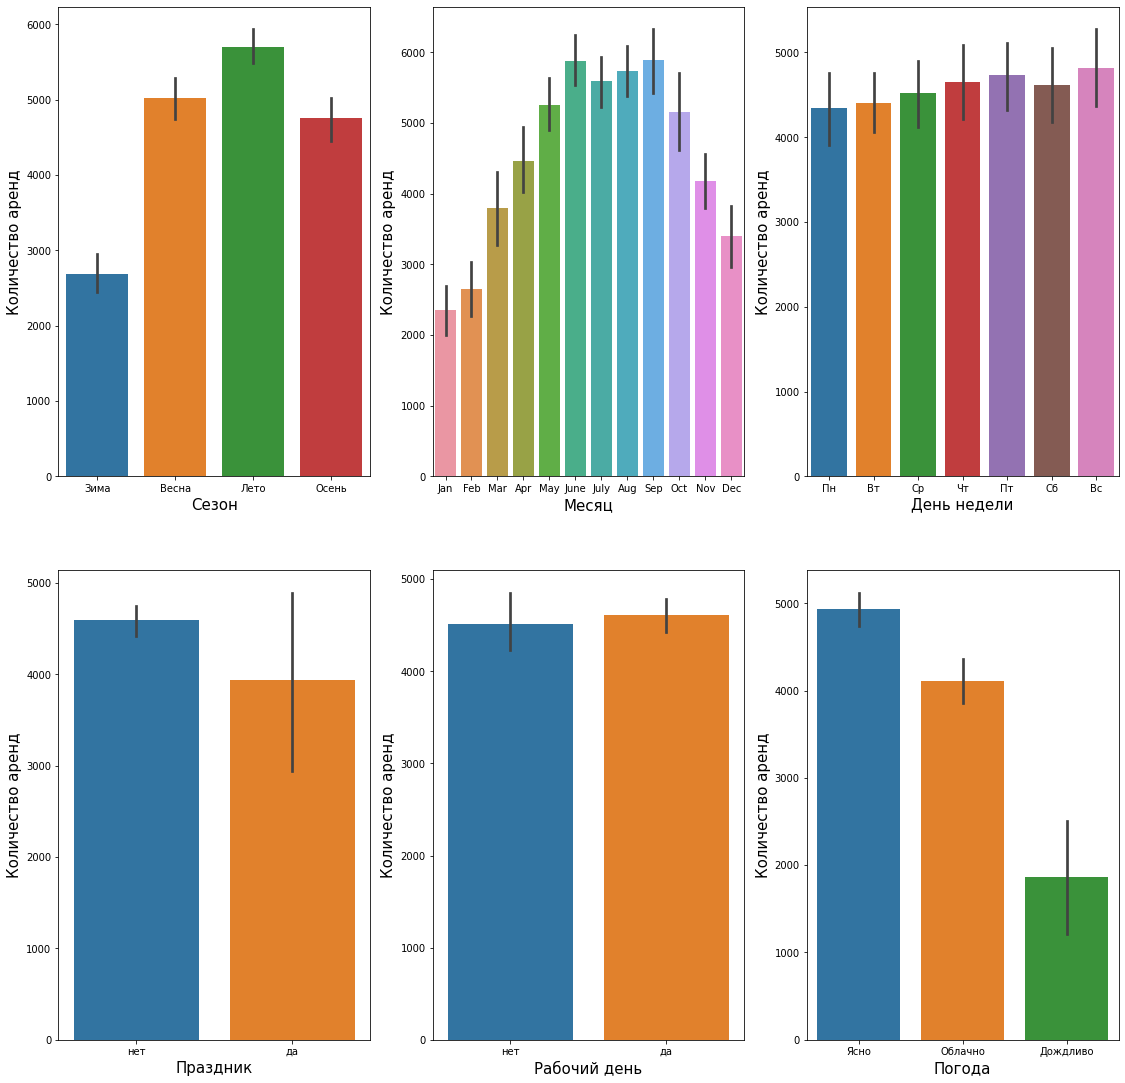

In [132]:
x_ticks = {
    'season': ['Зима', 'Весна', 'Лето', 'Осень'],
    'mnth': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
    'weekday': ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'],
    'holiday': ['нет', 'да'],
    'workingday': ['нет', 'да'],
    'weathersit': ['Ясно', 'Облачно', 'Дождливо']
}
labels = ['Сезон', 'Месяц', 'День недели', 'Праздник', 'Рабочий день', 'Погода']
fig, axes = plt.subplots(2, 3, figsize=(19, 19))
for ax, col, xlabel in zip(axes.flat, category_cols, labels):
    sns.barplot(x=col, y='cnt', data=train_data, ax=ax)
    ax.set_xticklabels(x_ticks[col])
    ax.set_xlabel(xlabel, fontsize = 15)
    ax.set_ylabel('Количество аренд', fontsize = 15)

**Выводы:**

Глядя на график распределения аренд по месяцам, можно сделать вывод что в readme датасета допущена ошибка. По месяцам видно, что зимой аренд намного меньше,чем в любое другое время года, а на графике сезонов таким сезоном является весна. 

Как и ожидалось, велосипед напрокат чаще всего берут в недождливую погоду. Также, зима является самым непопулярным сезоном для проката велосипедов. Еще отметим высокую аренду велосипедов в рабочие дни, что означает, что люди часто пользуются "зеленым" транспортом для передвижения с работы/на работу.

Какие признаки категориальные, а какие &mdash; вещественные? Что нужно сделать с категориальными признаками? Выполните это. При необходимости можно сделать несложную обработку вещественных признаков.

Из описания в начале задачи можно сделать вывод, что категориальными признаками являются season, mnth, holiday, weekday, workingday, weathersit. Все остальные признаки являются вещественными.

Категориальные признаки необходимо закодировать. Закодируем их с помощью OneHotEncoder:

In [133]:
train_data['season'] = train_data['season'].apply(lambda x: x + 1)
train_data['mnth'] = train_data['mnth'].apply(lambda x: x + 1)
encoder = OneHotEncoder(drop='first', sparse=False)
train_cat = encoder.fit_transform(train_data[category_cols])
x_train = np.hstack([train_data[numeric_cols], train_cat])

Обучите линейную регрессию из `sklearn` на наших данных и посмотрите на полученные оценки коэффициентов.

In [134]:
model = LinearRegression(fit_intercept=True)
model.fit(x_train, train_data[target])

LinearRegression()

In [135]:
print('Оценки коэффициентов:', model.coef_)

Оценки коэффициентов: [  -57.119   212.562   -38.451   -52.999  1158.455   815.374  1570.694
  -169.337   -30.722  -711.48   -602.299  -789.008 -1375.245  -721.062
   185.026  -188.795  -665.759  -363.123  -133.817  -145.397   110.36
    26.866   141.845   424.327  -219.377   219.235   -59.585 -1762.823]


In [136]:
print('Оценка свободного члена:', model.intercept_)

Оценка свободного члена: 3188.659767409698


Посчитайте ошибку предсказания на тестовой выборке по метрикам RMSE, MAE, MAPE.

In [137]:
def mean_absolute_percentage_error(y_true, y_pred):
    return 100 * (np.abs(y_true - y_pred) / y_true).mean()

In [138]:
test_cat = encoder.transform(test_data[category_cols])
x_test = np.hstack([test_data[numeric_cols], test_cat])
predict = model.predict(x_test)
print('RMSE: {}'.format(metrics.mean_squared_error(predict, test_data[target])**0.5))
print('MAE: {}'.format(metrics.mean_absolute_error(predict, test_data[target])))
print('MAPE: {}'.format(mean_absolute_percentage_error(predict, test_data[target])))

RMSE: 1447.789520875147
MAE: 1206.061118762578
MAPE: 24.45355593119805


Попробуйте посчитать оценку коэффициентов с помощью формулы, полученной на занятии. В чем заключается проблема?

*Подсказка.* Подумайте о зависимостях между признаками.

In [139]:
X = np.hstack([x_train, np.ones((len(x_train), 1))])
Y = train_data[target].to_numpy()
coefs = (np.linalg.inv(X.T @ X) @ X.T @ Y)
print('Оценки коэффициентов, полученные из формулы:',coefs)

Оценки коэффициентов, полученные из формулы: [ -22765.83    20485.72      -57.963    -442.564   -1391.232   -6303.127
     705.956    4823.352     701.085    7407.834    5797.908    8405.795
   13850.758   12790.515    9282.56    -3284.771    3763.06     2334.507
  356547.901  419008.728  396414.332  403796.08   367393.681     471.011
 -422025.943 -409444.395     -59.585   -1762.823    3188.66 ]


Некоторые коэффициенты совпали, а некоторые различаются на приличный порядок.

Проблема заключается в том, что некоторые признаки сильно коррелируют друг с другом: дождь и влажность, температура и ощущаемая температура, праздник и выходной. Удалим по одному признаку из пары и попытаемся обучить заново.

Исправьте эту проблему, посчитайте оценки коэффициентов, а также ошибку предсказания.

In [140]:
new_numeric_cols = ['temp', 'hum', 'windspeed']
new_category_cols = ['mnth', 'holiday', 'weathersit']

In [141]:
new_encoder = OneHotEncoder(drop='first', sparse=False)
new_train_cat = new_encoder.fit_transform(train_data[new_category_cols])
new_x_train = np.hstack([train_data[new_numeric_cols], new_train_cat])

In [142]:
new_model = LinearRegression(fit_intercept=True)
new_model.fit(new_x_train, train_data[target])

LinearRegression()

In [143]:
print('Оценки коэффициентов:', new_model.coef_)
print('Оценка свободного члена:', np.round(new_model.intercept_,3))

Оценки коэффициентов: [  180.986   -36.372   -65.847   -95.574   448.856   546.433   519.218
   158.262  -699.712   -79.651  1120.44   1415.351   998.546   710.635
  -669.179   -71.822 -1822.028]
Оценка свободного члена: 3661.639


In [144]:
new_test_cat = new_encoder.transform(test_data[new_category_cols])
new_x_test = np.hstack([test_data[new_numeric_cols], new_test_cat])
new_predict = new_model.predict(new_x_test)
print('RMSE: {}'.format(metrics.mean_squared_error(new_predict, test_data[target])**0.5))
print('MAE: {}'.format(metrics.mean_absolute_error(new_predict, test_data[target])))
print('MAPE: {}'.format(mean_absolute_percentage_error(new_predict, test_data[target])))

RMSE: 1340.7994217434666
MAE: 1175.0736454197602
MAPE: 23.007080473311166


In [145]:
new_X = np.hstack([new_x_train, np.ones((len(x_train), 1))])
new_Y = train_data[target]
coefs = (np.linalg.inv(new_X.T @ new_X) @ new_X.T @ new_Y)
print('Оценки коэффициентов, полученные из формулы:', coefs)

Оценки коэффициентов, полученные из формулы: [  180.986   -36.372   -65.847   -95.574   448.856   546.433   519.218
   158.262  -699.712   -79.651  1120.44   1415.351   998.546   710.635
  -669.179   -71.822 -1822.028  3661.639]


Сделайте выводы.

После выброса коррелирующих признаков модель обучилась не хуже, а даже чуть-чуть лучше. Также, мы смогли вручную (по формуле, полученной на лекции) получить оценку на коэффициенты регрессии, неотличимую от оценки, которую генерирует встроенная библиотека.

### Задача 3.

На занятии мы уже научились классифицировать текстовые сообщения на нормальные и спам. Теперь перед вами стоит более серьезная задача &mdash; построить систему, автоматически классифицирующую поступающие новостные сюжеты на несколько заранее заданных категорий.
 
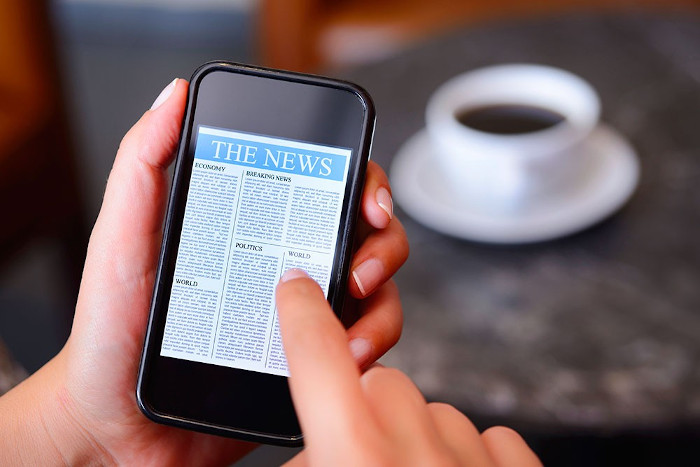



Перед выполнением задания обязательно посмотрите <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/bayes_classification.html">ноутбук</a> с занятия по классификации.

---

С помощью кода ниже загрузите встроенные в `sklearn` <a target="_blank" href="https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_20newsgroups.html#sklearn.datasets.fetch_20newsgroups">данные</a>, в которых представлены различные новостные сюжеты, разделенные на 20 тематических групп.

In [196]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [197]:
# удаляем заголовки и подписи
remove = ('headers', 'footers')
# зафиксируем зерно случайности
random_state = 42

# Извлекаем обучающую и тестовую части перемешивая случайным образом
data_train = fetch_20newsgroups(
    subset='train', shuffle=True, random_state=random_state, remove=remove
)
data_test = fetch_20newsgroups(
    subset='test', shuffle=True, random_state=random_state, remove=remove
)

Посмотрим на какое-нибудь сообщение

In [198]:
print(data_train['data'][21])

In article <1993Apr20.151818.4319@samba.oit.unc.edu> Scott.Marks@launchpad.unc.edu (Scott Marks) writes:
>>And of course, Mike Ramsey was (at one time) the captain in Buffalo prior to
>>being traded to Pittsburgh.  Currently, the Penguins have 3 former captains
>>and 1 real captain (Lemieux) playing for them.  They rotate the A's during the
>>season (and even the C while Mario was out).  Even Troy Loney has worn the C
>>for the Pens.
>

I think that Mike Foligno was the captain of the Sabres when he
got traded to the Leafs. Also, wasn't Rick Vaive the captain of
the Leafs when he got traded to Chicago (with Steve Thomas for
Ed Olcyzk and someone). Speaking of the Leafs, I believe that
Darryl Sittler was their captain (he'd torn the "C" off his
jersey but I think he re-claimed the captaincy later on) when he
was traded to the Flyers.

Oh yeah, of course, Gretzky was the captain of the Oilers before
he was traded wasn't he? 


Индекс тематической группы для каждого сообщения

In [199]:
data_train['target']

array([7, 4, 4, ..., 3, 1, 8])

Названия тематических групп

In [200]:
data_train['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

С помощью методов, изученных в рамках нашего курса, постройте классификатор новостных сюжетов на тематические группы. При построении классификатора **запрещено пользоваться тестовой выборкой**. Для настройки классификатора, например, выбора оптимальных гиперпараметров, можно разделить обучающую выборку на две части &mdash; непосредственно обучающую и валидационную. Первую часть использовать для непосредственного обучения, а вторую &mdash; для настройки, пытаясь по ней оптимизировать качество.

Создадим датафрейм для удобной работы:

In [201]:
train_data = pd.DataFrame({'data' : data_train['data'],'target' : data_train['target']})
test_data = pd.DataFrame({'data' : data_test['data'],'target' : data_test['target']})
train_data, validate_data =  train_test_split(train_data)

In [202]:
train_data.head()

,data,target
1427,"Source: ""Men Are Like That"" by Leonard Ramsden...",17
5991,Stephen Lawrence (s4lawren@sms.business.uwo.ca...,10
7144,"On 21 Apr 93 02:59:52 GMT, Glenn R. Stone (gs2...",16
8446,\nIn article <1993Apr21.053516.28846@cactus.or...,7
5577,"Hello,\n\n I have seen two common threads run...",15


Предообработаем данные с помощью CountVectorizer:

In [203]:
vectorizer = CountVectorizer(min_df=0.015, max_df=0.07)
train_data_vec = vectorizer.fit_transform(train_data['data']).toarray()
validate_data_vec = vectorizer.transform(validate_data['data']).toarray()

In [204]:
print(train_data_vec)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


Так как данные дискретного типа, будем строить дискретный байесовский классификатор.Будем рассматривать различные возможные значения коэффициента сглаживания Лапласа: 

In [205]:
alphas = np.linspace(0.05,2, 30)
for alpha in alphas:
    multinomial_nb = MultinomialNB(alpha = alpha)
    multinomial_nb.fit(train_data_vec, train_data['target'])
    predict = multinomial_nb.predict(validate_data_vec)
    accuracy = accuracy_score(validate_data.target, predict)
    print(f'При alpha = {np.round(alpha, 2)} точность равна {accuracy:.3}')

При alpha = 0.05 точность равна 0.66
При alpha = 0.12 точность равна 0.66
При alpha = 0.18 точность равна 0.662
При alpha = 0.25 точность равна 0.662
При alpha = 0.32 точность равна 0.66
При alpha = 0.39 точность равна 0.66
При alpha = 0.45 точность равна 0.66
При alpha = 0.52 точность равна 0.66
При alpha = 0.59 точность равна 0.661
При alpha = 0.66 точность равна 0.661
При alpha = 0.72 точность равна 0.661
При alpha = 0.79 точность равна 0.661
При alpha = 0.86 точность равна 0.662
При alpha = 0.92 точность равна 0.662
При alpha = 0.99 точность равна 0.661
При alpha = 1.06 точность равна 0.662
При alpha = 1.13 точность равна 0.661
При alpha = 1.19 точность равна 0.662
При alpha = 1.26 точность равна 0.662
При alpha = 1.33 точность равна 0.662
При alpha = 1.39 точность равна 0.662
При alpha = 1.46 точность равна 0.661
При alpha = 1.53 точность равна 0.662
При alpha = 1.6 точность равна 0.662
При alpha = 1.66 точность равна 0.661
При alpha = 1.73 точность равна 0.661
При alpha = 1.8 точ

Модель лучше всего обучилась при $\alpha \approx 0.22$. Еще раз обучим модель при данном параметре:

In [206]:
best_alpha = 0.28
multinomial_nb = MultinomialNB(alpha = best_alpha)
multinomial_nb.fit(train_data_vec, train_data['target'])

MultinomialNB(alpha=0.28)

Посчитайте качество на тестовой выборке.

In [207]:
train_data_vec = vectorizer.transform(train_data['data']).toarray()
predict = multinomial_nb.predict(train_data_vec)
accuracy = accuracy_score(train_data.target, predict)
print(f'Точность равна {accuracy:.3}')

Точность равна 0.735


Сделайте выводы.

Использовав дискретный байесовский классификатор для дискретных признаков, мы получили модель, которая имеет досточно хорошую точность распознавания -- 73-74%. После долгого перебора значений $\alpha$ стало очевидно, что лучше всего модель обучается при $\alpha \in (0, 0.3)$.

### <font color="orange"><i>Сложная часть</i></font>

Условие <b><font color="orange">сложной части</font></b> расположено по <a href="https://mipt-stats.gitlab.io/courses/ad_fivt/task4_hard.html">ссылке</a>.